# Questão 1 - Classificação
Elabore uma solução utilizando dois algoritmos de aprendizagem de máquina do seu conhecimento para classificar a emoção da música (escolha como você representará a saída, uma vez que algumas músicas podem pertencer a duas categorias). 
Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta os resultados obtidos em ambos. Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%. Os resultados dessa questão deverão ser descritos detalhadamente no relatório através de três pontos principais:
- Análise da base de dados: identificar instancias com atributos incompletos, gerar matriz de correlação, identificar a presença de outliers e verificar se as classes estão balanceadas. O balanceamento devera ser ilustrado por meio de gráficos (e.g. histograma);
- Análise dos resultados considerando matriz de confusão, especificidade, sensibilidade, medida f1 e acurácia. Descreva detalhadamente os resultados obtidos por cada métrica,justificando a diferença entre eles.

<b>Bônus</b>: Altere dois parâmetros de cada algoritmo de aprendizagem de maquina utilizados na questão e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e a função de distancia utilizada, alterar a função kernel do SVM, alterar a arquitetura da rede neural (e.x. camadas e função de ativação, alterar o otimizador e a taxa de aprendizado).

## Preliminares
Importação de dependências, carregamento da base de dados e observação inicial dos dados.

In [1]:
from scipy.io import arff
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import manifold
from sklearn import neural_network
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
#emotions.arff contem todas as instancias de test e train
data = arff.loadarff('multilabel-classification-emotions/emotions.arff')
df = pd.DataFrame(data[0])

df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


Pelo visto nessas 5 primeiras linhas, o que se tem é que a base de dados aparenta ter sido originada por algum algoritmo de aprendizagem de máquina não supervisionado, além dos nomes dos atributos não ajudarem muito a explicar o significado do mesmo.

Ainda, há uma alta dimensionalidade na base de dados, sendo 72 atributos de entrada e 6 atributos alvo, no caso dos atributos alvo, eles serão mantidos em colunas separadas.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
Mean_Acc1298_Mean_Mem40_Centroid    593 non-null float64
Mean_Acc1298_Mean_Mem40_Rolloff     593 non-null float64
Mean_Acc1298_Mean_Mem40_Flux        593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_0      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_1      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_2      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_3      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_4      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_5      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_6      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_7      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_8      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_9      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_10     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_11     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_12     593 

Os únicos atributos não numéricos são os atributos alvos, que deverão ser convertidos posteriormente. Por fim, a última preliminar é checar se existe algum dado ausente e também quantos valores diferentes existem para cada atributo:

In [4]:
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']

for (name, data) in df.iteritems():
    print("Coluna: %s Faltando: %d Valores Unicos: %d" % (name, df[name].isnull().sum(), len(df[name].unique())))


Coluna: Mean_Acc1298_Mean_Mem40_Centroid Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_Rolloff Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_Flux Faltando: 0 Valores Unicos: 584
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_0 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_1 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_2 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_3 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_4 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_5 Faltando: 0 Valores Unicos: 592
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_6 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_7 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_8 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_9 Faltando: 0 Valores Unicos: 593
Coluna: Mean_Acc1298_Mean_Mem40_MFCC_10 Faltando: 0 Valores Unicos: 592
Colu

~Milagrosamente~ Todos os atributos não possuem valores faltando, além disso todos os atributos possuem mais de um valor único. Portanto, nenhuma ação adicional será tomada quanto a eliminar colunas e/ou linhas por falta de dados.

## Tratando atributos não numéricos
Nesta base de dados, os únicos atributos apresentados de forma não numérica são os atributos alvos, como visto antes, cada um admite dois valores distintos, primeiramente, verifica-se quais são os valores existentes para cada um.

In [5]:
for label in labels:
    print("Valores únicos de", label, ":", df[label].unique(), "\n")

Valores únicos de amazed-suprised : [b'0' b'1'] 

Valores únicos de happy-pleased : [b'1' b'0'] 

Valores únicos de relaxing-calm : [b'1' b'0'] 

Valores únicos de quiet-still : [b'0' b'1'] 

Valores únicos de sad-lonely : [b'0' b'1'] 

Valores únicos de angry-aggresive : [b'0' b'1'] 



Para todos estes atributos, os valores existentes são b'0' ou b'1', logo é bastante simples mapear os valores existentes para valores numéricos usando um dicionário.

In [6]:
to_num = {
   "b'1'" : 1, "b'0'": 0
}

for label in labels:
    df[label] = df[label].apply(lambda x : to_num[str(x)])

## Analisando correlação
Inicialmente vejamos a matriz de correlação de todos os atributos da base da dados.

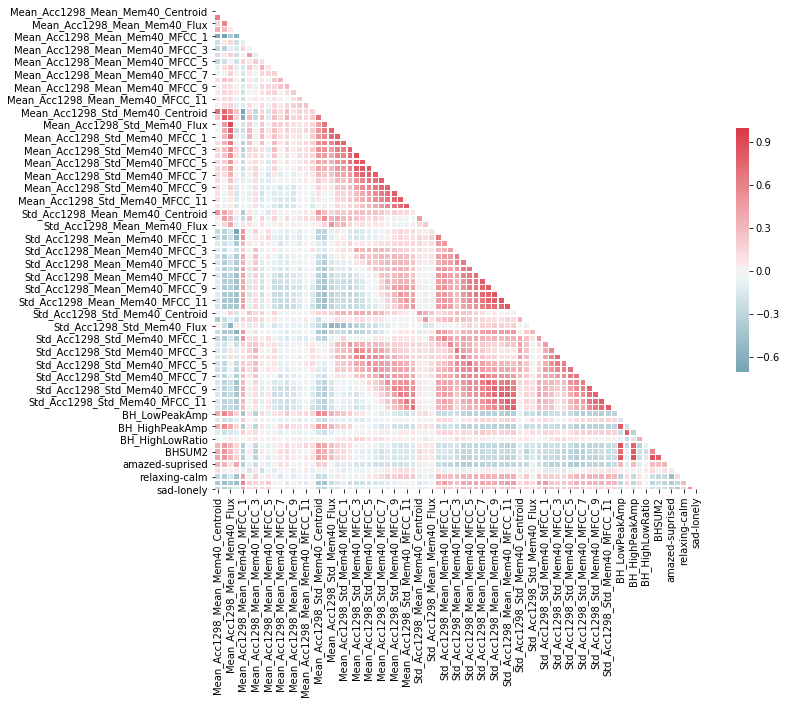

In [7]:
corr = df.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

A matriz acima mostra que existem um número considerável de atributos com uma correlação positiva forte (representados pela cor vermelha mais forte), quanto a correlação negativa, nenhum par de atributo aparenta ter uma correlação negativa forte (no caso do mapa acima a maior está próxima de -0.6).

Tendo em vista a alta dimensionalidade da base de dados, é mais interessante inicialmente visualizar a matriz de correlação dos atributos de entrada em relação aos atributos desejados.

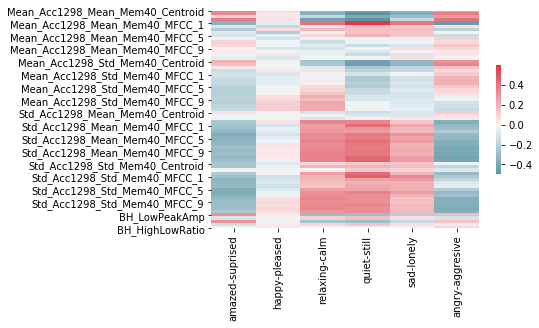

In [8]:
correl = df.corr().iloc[ : -6, -6: ]
#correl = df.corr()
#correl.style.background_gradient(cmap = 'coolwarm')
sns.heatmap(correl, cmap = cmap, center = 0,
            square = False, cbar_kws = {"shrink": .5})

Pela matriz acima, é possível perceber que nenhum atributo de entrada possui uma correlação forte (> 0.8, em valores absolutos) com algum atributo alvo. Além disso, entre os 6 atributos alvo, o 'happy-pleased' é o que possui a correlação mais fraca com os atributos de entrada. Vejamos agora a correlação entre os atributos alvo:

In [9]:
correl_targets = df.corr().iloc[-6 : , -6: ]

correl_targets.style.background_gradient(cmap = 'coolwarm')

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
amazed-suprised,1,0.0625649,-0.477873,-0.370126,-0.321184,0.293468
happy-pleased,0.0625649,1,0.129219,-0.298822,-0.383677,-0.329735
relaxing-calm,-0.477873,0.129219,1,0.298812,0.152166,-0.561723
quiet-still,-0.370126,-0.298822,0.298812,1,0.54541,-0.377725
sad-lonely,-0.321184,-0.383677,0.152166,0.54541,1,-0.269406
angry-aggresive,0.293468,-0.329735,-0.561723,-0.377725,-0.269406,1


Novamente, há uma ausência de correlação forte entre um par distinto de atributos que busca-se prever. Por fim, com base na correlação entre os atributos de entrada, vejamos quais são as maiores:

In [10]:
correl_in = df.corr().iloc[ : -6, : - 6]

c = correl_in.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

# Indices obtidos na mao
print(so[-120:-72])

BH_HighPeakAmp                   BHSUM2                             0.800536
BHSUM2                           BH_HighPeakAmp                     0.800536
BHSUM3                           BHSUM2                             0.800814
BHSUM2                           BHSUM3                             0.800814
Mean_Acc1298_Std_Mem40_MFCC_12   Mean_Acc1298_Std_Mem40_MFCC_11     0.803408
Mean_Acc1298_Std_Mem40_MFCC_11   Mean_Acc1298_Std_Mem40_MFCC_12     0.803408
Std_Acc1298_Mean_Mem40_MFCC_7    Std_Acc1298_Mean_Mem40_MFCC_8      0.804741
Std_Acc1298_Mean_Mem40_MFCC_8    Std_Acc1298_Mean_Mem40_MFCC_7      0.804741
Mean_Acc1298_Mean_Mem40_Rolloff  Mean_Acc1298_Std_Mem40_Rolloff     0.809104
Mean_Acc1298_Std_Mem40_Rolloff   Mean_Acc1298_Mean_Mem40_Rolloff    0.809104
Mean_Acc1298_Std_Mem40_MFCC_6    Mean_Acc1298_Std_Mem40_MFCC_7      0.810537
Mean_Acc1298_Std_Mem40_MFCC_7    Mean_Acc1298_Std_Mem40_MFCC_6      0.810537
BH_LowPeakAmp                    BH_HighPeakAmp                     0.816633

Este último código mostra que existem 24 pares distintos que possuem uma correlação forte (> 0.8), logo executar a técnica da análise principal de componentes (PCA) poderá ajudar a diminuir a dimensionalidade desta base de dados adiante.

## Detectando outliers

Por conta da alta dimensionalidade da base de dados, a detecção de outliers será feita utilizando um laço percorrendo todas as colunas da base de dados, checando se existe algum outlier para tal coluna em cada iteração, caso positivo tais linhas que contém outliers são inseridas em uma lista, além de que é mostrado a quantidade de outliers para tal atributo (e sua porcentagem em relação ao total). 

A métrica utilizada para detectar outlier é o Z-score que mede o relacionamento de um valor para a média de um grupo de valores, medida em termos do desvio padrão da média, um valor 0 indica que o valor é identico ao 'score' da média e que um valor de 1.0 indica que o valor está a um desvio padrão da média. 

Neste caso, o valor utilizado para filtragem será 3.0, o que significa que valores que estão a três desvios padrões ou mais da média (em termos absolutos) serão considerados como outliers.


Colunas com outliers: 70 (Pct = 0.90)

Total: 486


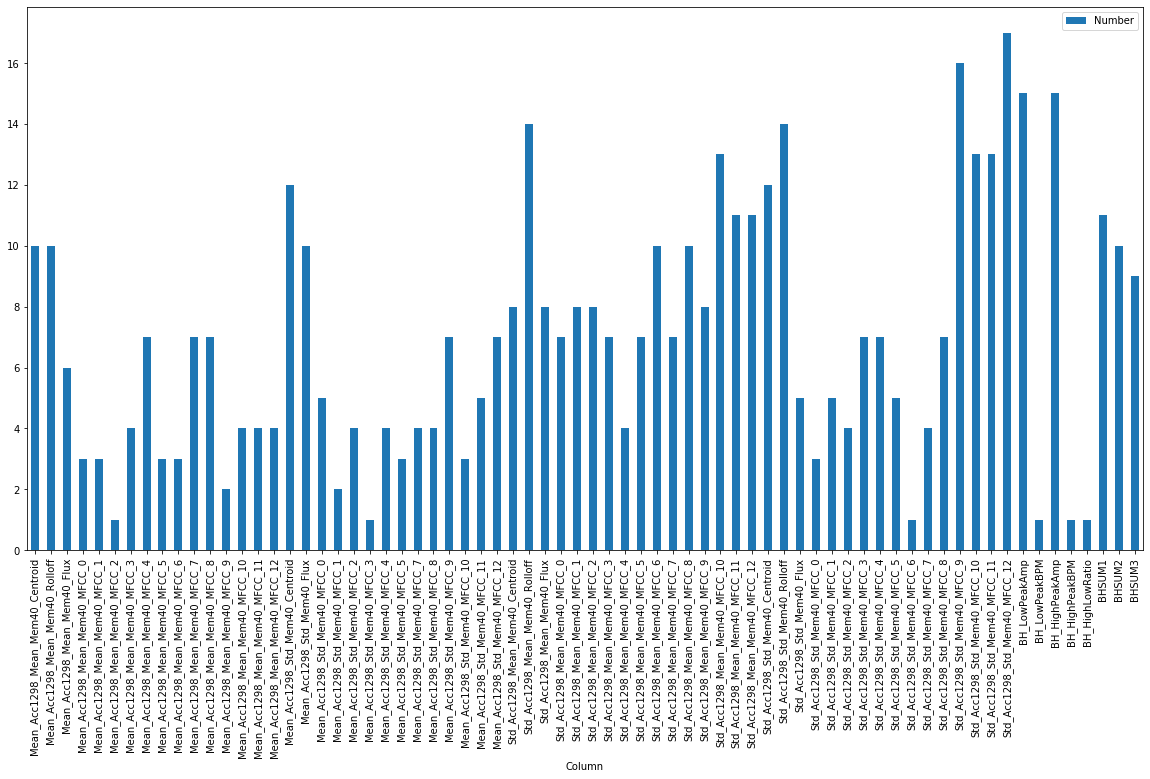

In [11]:
threshold = 3
outliers = []
columns = []
results = []
total = 0
for column in df.columns:
    outs = len(df[(np.abs(stats.zscore(df[column])) >= threshold)])
    total += outs
    if(outs > 0):
        columns.append(column)
        outliers.append(df[(np.abs(stats.zscore(df[column])) >= threshold)])
        results.append({"Number": len(df[(np.abs(stats.zscore(df[column])) >= threshold)]), "Column": column})
        #print("Outliers em %s: %d (Pct = %.2f)" % (column, outs, outs/len(df)))

print("\nColunas com outliers: %d (Pct = %.2f)" % (len(outliers), len(outliers)/len(df.columns)))
print("\nTotal: %d" % (total))

pd.DataFrame(results).plot.bar(x = "Column", y = "Number", figsize = (20, 10))

Pelo resultado acima, 90% das colunas possuem pelo menos 1 outlier, enquanto que nenhuma coluna possui mais do que 17 (ou 3%) dos seus valores como outliers. 

Abaixo, vejamos a quantidade de entradas na base de dados que possuem pelo menos um outlier em uma das colunas:

In [12]:
outliers_df = pd.concat(outliers)

outliers_df.drop_duplicates(keep = 'first', inplace = True)

print("Instancias com outliers:", len(outliers_df))

outliers_df.head()

Instancias com outliers: 184


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
44,0.172193,0.515556,0.089991,-72.913644,1.839893,2.311600,0.980418,0.896726,0.706043,0.739761,...,2.0,1.671050,1.646543,3.331277,1,1,0,0,0,0
91,0.168687,0.698277,0.093261,-73.425628,1.493242,2.140450,0.850997,1.201210,1.039796,0.835462,...,2.0,0.665140,0.694562,1.507699,1,0,0,0,0,1
101,0.188637,0.537260,0.096170,-77.755431,0.697836,1.256725,1.018783,0.604422,0.062336,-0.222341,...,2.0,1.443186,1.762948,3.206134,0,0,0,0,0,1
111,0.172679,0.504049,0.098053,-69.838918,1.960140,0.882767,0.600617,0.740820,0.494457,0.262374,...,2.0,0.448257,1.175462,2.258324,1,0,0,0,0,1
136,0.174965,0.544257,0.085136,-68.118250,1.660375,0.367742,0.917574,0.990992,0.917184,0.359717,...,2.0,1.201197,1.435895,2.656136,1,0,0,0,0,0


Existem 184 linhas com outlier em pelo menos uma coluna (ou 31% da base dados contém um outlier em pelo menos uma das colunas), o que significa que eliminar todas essas linhas simplesmente poderá empobrecer a base de dados. Por ora, pelo fato do alto número de outliers e o desconhecimento do que se trate cada atributo, não será feito nenhum tratamento para outliers.

## Balanceamento das classes

Quantidade de amazed-suprised: 173 (Pct = 0.292)
Quantidade de happy-pleased: 166 (Pct = 0.280)
Quantidade de relaxing-calm: 264 (Pct = 0.445)
Quantidade de quiet-still: 148 (Pct = 0.250)
Quantidade de sad-lonely: 168 (Pct = 0.283)
Quantidade de angry-aggresive: 189 (Pct = 0.319)


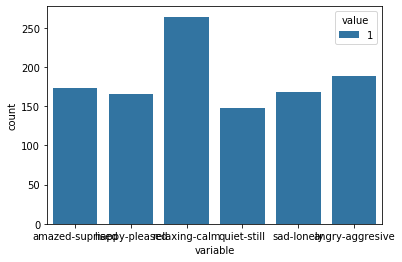

In [13]:
melt = pd.melt(df[labels])
sns.countplot(data = melt.loc[melt['value'] == 1], x = 'variable', hue = 'value')
for label in labels:
    count = df[label].value_counts()[1]
    print("Quantidade de %s: %d (Pct = %.3f)" %(label, count, count / len(df)))

Há um certo desbalanceamento entre os atributos desejados, sendo que a classe relaxing-calm a que está mais desbalanceada em relação as outras classes (em termos proporcionais ocorre pelo menos 10% mais do que qualquer outra classe), enquanto que as outras classes estão razoavelmente balanceadas entre si, ocorrendo em 25% a 31.9% dos objetos.

## Normalização dos atributos
Por conta da falta de tratamento para outliers é feita a normalização dos atributos por meio da padronização, que pode vir a lidar melhor com outliers não tratados anteriormente.

In [14]:
df_labels = df[labels].copy()

dummy_df = df.copy()
dummy_df.drop(columns = labels, inplace = True)

scaler = preprocessing.StandardScaler()

scaled = pd.concat([pd.DataFrame(scaler.fit_transform(dummy_df), columns = dummy_df.columns.values), df_labels], axis=1)

scaled.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,-1.105588,-0.899816,0.597753,-0.040161,0.597089,0.012470,0.565174,0.378949,1.270225,0.166709,...,-0.315080,-0.493653,-0.690238,-0.851414,0,1,1,0,0,0
1,0.385855,0.658245,0.004144,1.374865,-0.867621,-0.807026,-2.527081,-0.031013,-1.020242,-1.539939,...,-0.315080,-0.204534,-0.216973,-0.382298,1,0,0,0,0,1
2,1.318818,0.665224,-0.138854,1.024886,-1.055153,0.036048,-0.681981,0.275978,-0.936280,0.394614,...,2.851744,-0.660964,-0.853584,-0.771613,0,1,0,0,0,1
3,-0.858043,0.033036,0.837920,-0.964686,0.408315,0.045688,0.099403,1.921137,-0.255584,0.995258,...,-0.315080,-0.914017,-0.312101,-0.934927,0,0,1,0,0,0
4,0.167606,-0.463967,-0.638319,-2.732823,0.272482,0.454261,-1.312511,0.571361,-0.357706,-0.057338,...,-0.315080,-0.641796,-0.121837,-0.423919,0,0,0,1,0,0


## Executando os algoritmos
Inicialmente, gera-se o conjunto de treinamento e teste, a divisão utilizada é a 80/20, sendo ambas geradas de maneira semi-aleatória, a partir do parâmetro 'random_state'.

In [15]:
train, test = model_selection.train_test_split(scaled.copy(), test_size = 0.2, random_state = 77, shuffle = True)

trainTarget = train[labels].copy()
testTarget = test[labels].copy()

train.drop(columns = labels, inplace = True)
test.drop(columns = labels, inplace = True)

O primeiro algoritmo utilizado será a árvore de decisão para classificação:

In [16]:
dtc = tree.DecisionTreeClassifier(random_state = 42)
dtc.fit(train, trainTarget)
resultDtc = dtc.predict(test)

O segundo algoritmo utilizado será a rede neural perceptron multicamadas:

In [17]:
mlp = neural_network.MLPClassifier(max_iter = 1000, random_state = 42)
mlp.fit(train, trainTarget)
resultMlp = mlp.predict(test)

Para avaliação do desempenho dos algoritmos serão utilizados as métricas F1, precisão, acurácia, sensibilidade e especificidade, além da matriz de confusão:

In [18]:
def getMetrics(target, result, algorithm = "Unnamed"):
    print(algorithm)
    print("F1: %0.3f" % (metrics.f1_score(target, result, average = 'macro')))
    print("Precisao: %0.3f" % (metrics.precision_score(target, result, average = 'macro')))
    print("Acuracia: %0.3f" % (metrics.accuracy_score(target, result, normalize = True)))
    
    matrix = metrics.multilabel_confusion_matrix(target, result)
    sens = 0
    spec = 0
    #acc = 0
    for i in range(len(matrix)):
        [[true_positive, false_positive], [true_negative, false_negative]] = matrix[i]
        sens += (true_positive / (true_positive + false_positive))
        spec += (true_negative / (true_negative + false_negative))
        #acc += ((true_positive + true_negative)/ (true_positive + true_negative + false_positive + false_negative))
        
    #print("Acuracia: %0.3f" % (acc / len(matrix)))
    print("Sensibilidade: %0.3f" % (sens / len(matrix)))
    print("Especificidade: %0.3f\n" % (spec / len(matrix)))

In [19]:
getMetrics(testTarget, resultDtc, "Decision Tree Classifier (vs Test)")
#getMetrics(trainTarget, dtc.predict(train), "Decision Tree Classifier (vs Train)")

getMetrics(testTarget, resultMlp, "Multilayer Perceptron (vs Test)")
#getMetrics(trainTarget, mlp.predict(train), "Multilayer Perceptron (vs Train)")

Decision Tree Classifier (vs Test)
F1: 0.550
Precisao: 0.557
Acuracia: 0.210
Sensibilidade: 0.794
Especificidade: 0.451

Multilayer Perceptron (vs Test)
F1: 0.678
Precisao: 0.725
Acuracia: 0.261
Sensibilidade: 0.873
Especificidade: 0.356



## Alterando parâmetros
Usando o mesmo conjunto de treinamento e testa, desta vez, reexcuta-se os algoritmos alterando os parâmetros deles.

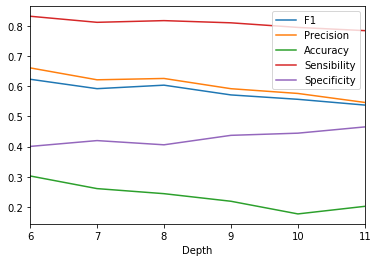

In [20]:
results_depth = []

for depth in range(6, 12):
    dtc2 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = depth, random_state = 42)
    dtc2.fit(train, trainTarget)
    resultDtc2 = dtc2.predict(test)
    
    matrix = metrics.multilabel_confusion_matrix(testTarget, resultDtc2)
    sens = 0
    spec = 0
    for i in range(len(matrix)):
        [[true_positive, false_positive], [true_negative, false_negative]] = matrix[i]
        sens += (true_positive / (true_positive + false_positive))
        spec += (true_negative / (true_negative + false_negative))
    
    results_depth.append({"Depth": depth, 
                         "F1": metrics.f1_score(testTarget, resultDtc2, average = 'macro'),
                         "Precision": metrics.precision_score(testTarget, resultDtc2, average = 'macro'),
                         "Accuracy": metrics.accuracy_score(testTarget, resultDtc2, normalize = True),
                         "Sensibility": sens / len(matrix),
                         "Specificity": spec / len(matrix)})
    
pd.DataFrame(results_depth).plot.line(x = "Depth",
                                y = ["F1", "Precision", "Accuracy", "Sensibility", "Specificity"])

Para a rede neural, os paramêtros alterados serão a função de ativação (que por padrão é f(x) = max(0, x)) para a função identidade f(x) = x) e o método utilizado para resolver a otimização de pesos para lbfgs (era anteriormente uma variação do sgd).

In [21]:
mlp2 = neural_network.MLPClassifier(max_iter = 1000, random_state = 42, activation = 'identity', solver = 'lbfgs')
mlp2.fit(train, trainTarget)
resultMlp2 = mlp2.predict(test)

getMetrics(testTarget, resultMlp2, "Multilayer Perceptron (Identity, lbfgs)")

Multilayer Perceptron (Identity, lbfgs)
F1: 0.673
Precisao: 0.697
Acuracia: 0.286
Sensibilidade: 0.853
Especificidade: 0.331

